In [1]:
import numpy as np
actual = np.array([ 1.,1.,0.,1.,1.,1.,0.,0.,1.,0.,1.,0.,1.,0.,0.,0.,1.,0.,1.,0.])
score = np.array([ 0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.35,0.3,0.25,0.22,0.18,0.1])

In [2]:
def roc_curve(actual,score,n_thresholds):
    #thresholds = np.linspace(1,0,n_thresholds)
    #thresholds= score
    thresholds =np.concatenate([score,np.array([0.],float)])
    fpr = np.zeros((n_thresholds+1))
    tpr = np.zeros((n_thresholds+1))
    for i in range(n_thresholds+1):
        t = thresholds[i]
            
        # Create Confusion Matrix for current threshold.
    
        TruePositive_t = np.logical_and( score > t, actual==1 ).sum()
        TrueNegative_t = np.logical_and( score <=t, actual==0 ).sum()
        FalsePositive_t = np.logical_and( score > t, actual==0 ).sum()
        FalseNegative_t = np.logical_and( score <=t, actual==1 ).sum()

        # Compute false positive rate for current threshold and insert into fpr array.
        fpr[i] = FalsePositive_t / float(FalsePositive_t + TrueNegative_t)

        # Compute true  positive rate for current threshold and insert into tpr array..
        tpr[i] = TruePositive_t / float(TruePositive_t + FalseNegative_t)
        
    return fpr,tpr, thresholds
def auc(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve


In [3]:
fpr , tpr , thresholds = roc_curve(actual,score,len(score))
auc = auc(fpr,tpr)

In [4]:
thresholds

array([ 0.9  ,  0.8  ,  0.7  ,  0.6  ,  0.55 ,  0.54 ,  0.53 ,  0.52 ,
        0.51 ,  0.505,  0.4  ,  0.39 ,  0.38 ,  0.37 ,  0.35 ,  0.3  ,
        0.25 ,  0.22 ,  0.18 ,  0.1  ,  0.   ])

In [5]:
fpr

array([ 0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.2,  0.3,  0.3,  0.4,
        0.4,  0.5,  0.5,  0.6,  0.7,  0.8,  0.8,  0.9,  0.9,  1. ])

In [6]:
tpr

array([ 0. ,  0.1,  0.2,  0.2,  0.3,  0.4,  0.5,  0.5,  0.5,  0.6,  0.6,
        0.7,  0.7,  0.8,  0.8,  0.8,  0.8,  0.9,  0.9,  1. ,  1. ])

In [7]:
auc

0.67999999999999994

In [8]:
import pandas as pd
df=pd.DataFrame({'Threshold': thresholds, 
              'TPR': tpr, 
              'FPR':fpr,
              
             })
df=df[['Threshold','FPR','TPR']]
df

,Threshold,FPR,TPR
0,0.900,0.0,0.0
1,0.800,0.0,0.1
2,0.700,0.0,0.2
3,0.600,0.1,0.2
4,0.550,0.1,0.3
5,0.540,0.1,0.4
6,0.530,0.1,0.5
7,0.520,0.2,0.5
8,0.510,0.3,0.5
9,0.505,0.3,0.6


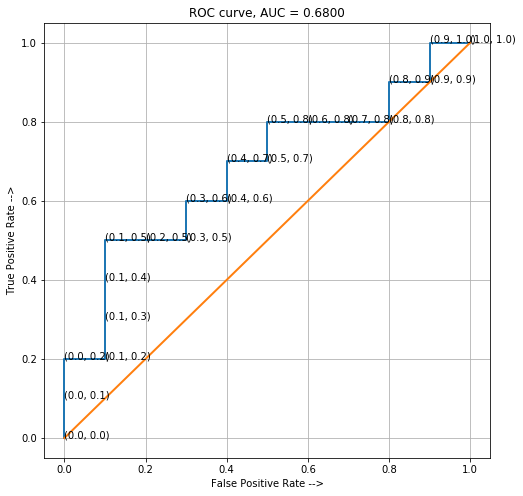

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
fig = plt.figure()
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

X_diag=([0.,1.])
Y_diag=([0.,1.])
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')
plt.plot(fpr, tpr, lw=2)
plt.plot(X_diag, Y_diag, lw=2)
plt.title('ROC curve, AUC = %.4f'%auc)

for xy in zip(fpr, tpr):                                     
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 

plt.grid()
plt.show()

In [10]:
X=(0.,0., 1/7, 1/7, 2/7, 3/7,  3/7,4/7,5/7,6/7,7/7)
Y=(0.,1/3,1/3, 2/3, 2/3, 2/3,  3/3,3/3,3/3,3/3,3/3)

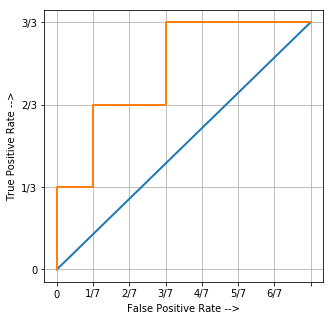

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  
fig = plt.figure()
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
y_tick = np.array([0,1/3,2/3,3/3])
x_tick = np.array([0,1/7,2/7,3/7,4/7,5/7,6/7,7/7])
my_xticks = ['0','1/7', '2/7', '3/7', '4/7','5/7','6/7']
my_yticks = ['0','1/3', '2/3', '3/3']
plt.xticks(x_tick, my_xticks)
plt.yticks(y_tick,my_yticks)
#plt.plot(x, y)
plt.grid(axis='y_tick', linestyle='-')
X_diag=([0.,1.])
Y_diag=([0.,1.])
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')
plt.plot(X_diag, Y_diag, lw=2)
plt.plot(X, Y, lw=2)
#plt.title('ROC curve, AUC = %.4f'%auc)
#for xy in zip(A, B):
#for xy in zip(X,Y):                                     
   #  ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 

plt.grid()
plt.show()